In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/sample_submission.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/48b636e0f5.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/9fb7805d99.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/e658b0aa3d.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/1c3719ea59.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/164adaed7b.parquet
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/24

In [4]:
cd ../input 

/kaggle/input


In [5]:
cd tlvmc-parkinsons-freezing-gait-prediction

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction


In [6]:
cd train/defog

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog


In [7]:
ls

02ea782681.csv  32d03020a9.csv  68e7e02a47.csv  9f2b3555c8.csv  daa4d27db4.csv
06414383cf.csv  38befe9f39.csv  6a20935af5.csv  a057215d88.csv  dd0ddc0bb5.csv
092b4c1819.csv  3e6987cb2d.csv  6c300fcdd5.csv  a2f1a8ab76.csv  e069a57511.csv
0c55be4384.csv  3f3b08f78d.csv  6dc94db321.csv  a8c5a489bd.csv  e1f92471b9.csv
0d7ab3a9f9.csv  3f970065e5.csv  7030643376.csv  aafcbecb5a.csv  e642d9ea5f.csv
0eaac04f17.csv  41bc215f97.csv  771d69d829.csv  afaec39b8c.csv  e971ae2a09.csv
0ec76d2d8e.csv  4520cf1068.csv  77d7d95074.csv  afc4b9d2a8.csv  edd79a7494.csv
139f60d29b.csv  4c0aec9035.csv  7a467da4f3.csv  b3891f42d0.csv  f0b8335d50.csv
13a4fe5159.csv  4c3aa8ea6e.csv  7a993fbed7.csv  b4365bba9d.csv  f17eacf7d8.csv
15508c7f41.csv  4ec23c3d98.csv  7b5346a3f2.csv  bdcff4be3a.csv  f2ffe15369.csv
18e7abc37e.csv  4f613ccf88.csv  8282009100.csv  bdda73c9be.csv  f3a921edee.csv
1d99c2eecf.csv  509a9830a6.csv  850748a138.csv  be15a0d6c5.csv  f40e8c6ebe.csv
1ff78d55e9.csv  519f292daa.csv  88c6d288fb.csv  be9d

In [8]:
import pandas as pd
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
csv_files = glob.glob('*.csv') # traverse the defog folder
dfmain = []
for file in csv_files:
    df = pd.read_csv(file)  # read the individual csv
    dfmain.append(df)        # append the df dataframe
dfmaster = pd.concat(dfmain,axis=0,ignore_index=True)
print(dfmaster) #print the merged dataframe

            Time      AccV     AccML     AccAP  StartHesitation  Turn  \
0              0 -1.002697  0.022371  0.068304                0     0   
1              1 -1.002641  0.019173  0.066162                0     0   
2              2 -0.999820  0.019142  0.067536                0     0   
3              3 -0.998023  0.018378  0.068409                0     0   
4              4 -0.998359  0.016726  0.066448                0     0   
...          ...       ...       ...       ...              ...   ...   
13525697  109120 -0.939241  0.031564 -0.394737                0     0   
13525698  109121 -0.941096  0.031582 -0.392626                0     0   
13525699  109122 -0.940131  0.029092 -0.394385                0     0   
13525700  109123 -0.939872  0.028058 -0.398664                0     0   
13525701  109124 -0.939006  0.026628 -0.398454                0     0   

          Walking  Valid   Task  
0               0  False  False  
1               0  False  False  
2               0  Fa

In [11]:
print(dfmaster)

<function print>

In [9]:
ls

02ea782681.csv  32d03020a9.csv  68e7e02a47.csv  9f2b3555c8.csv  daa4d27db4.csv
06414383cf.csv  38befe9f39.csv  6a20935af5.csv  a057215d88.csv  dd0ddc0bb5.csv
092b4c1819.csv  3e6987cb2d.csv  6c300fcdd5.csv  a2f1a8ab76.csv  e069a57511.csv
0c55be4384.csv  3f3b08f78d.csv  6dc94db321.csv  a8c5a489bd.csv  e1f92471b9.csv
0d7ab3a9f9.csv  3f970065e5.csv  7030643376.csv  aafcbecb5a.csv  e642d9ea5f.csv
0eaac04f17.csv  41bc215f97.csv  771d69d829.csv  afaec39b8c.csv  e971ae2a09.csv
0ec76d2d8e.csv  4520cf1068.csv  77d7d95074.csv  afc4b9d2a8.csv  edd79a7494.csv
139f60d29b.csv  4c0aec9035.csv  7a467da4f3.csv  b3891f42d0.csv  f0b8335d50.csv
13a4fe5159.csv  4c3aa8ea6e.csv  7a993fbed7.csv  b4365bba9d.csv  f17eacf7d8.csv
15508c7f41.csv  4ec23c3d98.csv  7b5346a3f2.csv  bdcff4be3a.csv  f2ffe15369.csv
18e7abc37e.csv  4f613ccf88.csv  8282009100.csv  bdda73c9be.csv  f3a921edee.csv
1d99c2eecf.csv  509a9830a6.csv  850748a138.csv  be15a0d6c5.csv  f40e8c6ebe.csv
1ff78d55e9.csv  519f292daa.csv  88c6d288fb.csv  be9d

In [12]:
csv_files = glob.glob('*.csv')  # traverse the defog folder
dfmains = []
for file  in csv_files:
    df = pd.read_csv(file)        #read the individual csv    
    dfmains.append(df)           # append the df dataframe
dfmaster1 = pd.concat(dfmains,axis=0,ignore_index=True)
print(dfmaster1) # print the merged dataframe

            Time      AccV     AccML     AccAP  StartHesitation  Turn  \
0              0 -1.002697  0.022371  0.068304                0     0   
1              1 -1.002641  0.019173  0.066162                0     0   
2              2 -0.999820  0.019142  0.067536                0     0   
3              3 -0.998023  0.018378  0.068409                0     0   
4              4 -0.998359  0.016726  0.066448                0     0   
...          ...       ...       ...       ...              ...   ...   
13525697  109120 -0.939241  0.031564 -0.394737                0     0   
13525698  109121 -0.941096  0.031582 -0.392626                0     0   
13525699  109122 -0.940131  0.029092 -0.394385                0     0   
13525700  109123 -0.939872  0.028058 -0.398664                0     0   
13525701  109124 -0.939006  0.026628 -0.398454                0     0   

          Walking  Valid   Task  
0               0  False  False  
1               0  False  False  
2               0  Fa

/tmp/ipykernel_32/1239050566.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data['AccV'], data['AccML'], data['AccAP'], c=cmap, cmap='viridis')


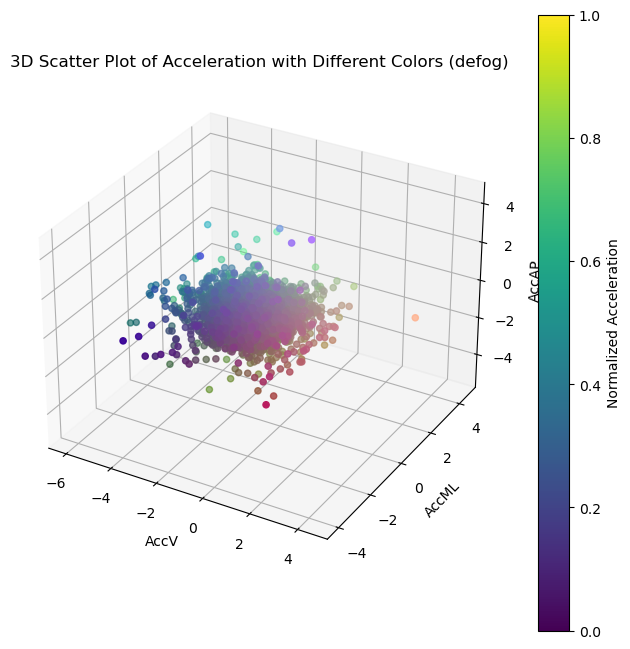

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data
data = dfmaster1

# Normalize the acceleration values
acceleration = data[['AccV', 'AccML', 'AccAP']]
normalized_acceleration = (acceleration - acceleration.min()) / (acceleration.max() - acceleration.min())

# Convert normalized values to RGB colors
cmap = normalized_acceleration.apply(lambda x: np.array(x), axis=1)

# Create a 3D scatter plot of the acceleration data with different colors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['AccV'], data['AccML'], data['AccAP'], c=cmap, cmap='viridis')
ax.set_xlabel('AccV')
ax.set_ylabel('AccML')
ax.set_zlabel('AccAP')
ax.set_title('3D Scatter Plot of Acceleration with Different Colors (defog)')

# Add a colorbar for reference
sc = ax.scatter([], [], [], c=[], cmap='viridis')
cbar = plt.colorbar(sc, ax=ax, label='Normalized Acceleration')

plt.show()


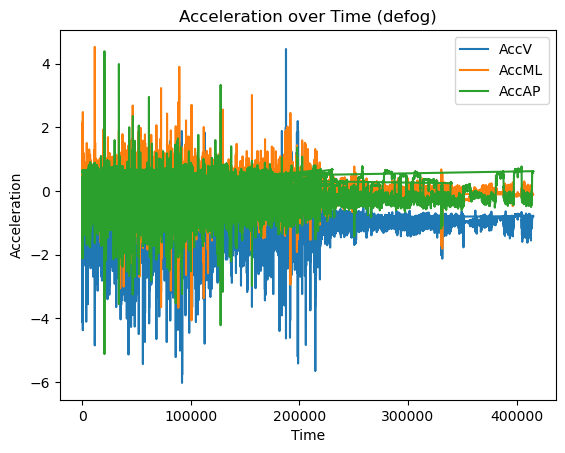

In [12]:
import matplotlib.pyplot as plt

plt.plot(dfmaster1['Time'], dfmaster1['AccV'], label='AccV')
plt.plot(dfmaster1['Time'], dfmaster1['AccML'], label='AccML')
plt.plot(dfmaster1['Time'], dfmaster1['AccAP'], label='AccAP')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.title('Acceleration over Time (defog)')
plt.show()


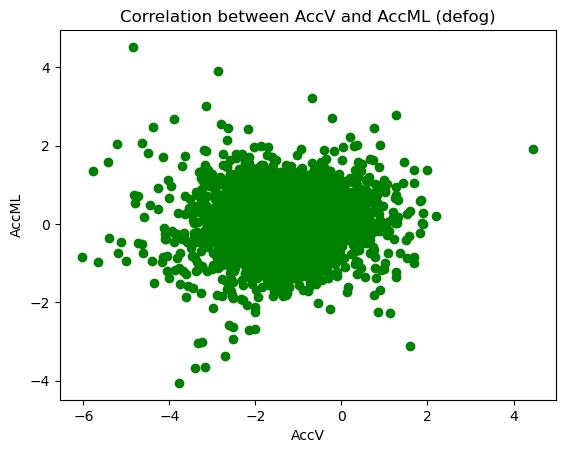

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of colors corresponding to each data point
colors = np.where(dfmaster1['AccV'] == dfmaster1['AccV'], 'r', 
         np.where(dfmaster1['AccML'] == dfmaster1['AccML'], 'g', 'b'))

plt.scatter(dfmaster1['AccV'], dfmaster1['AccML'], c='g')
plt.xlabel('AccV')
plt.ylabel('AccML')
plt.title('Correlation between AccV and AccML (defog)')
plt.show()


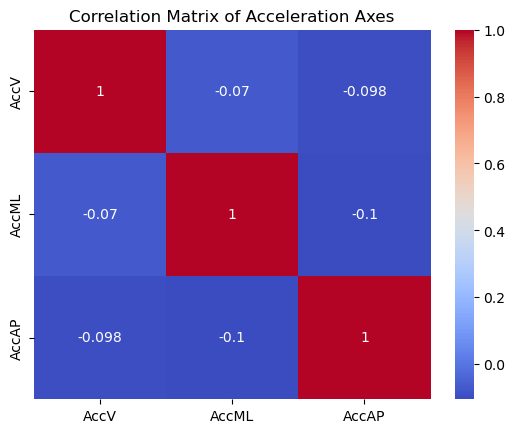

In [14]:
import seaborn as sns

correlation_matrix = dfmaster1[['AccV', 'AccML', 'AccAP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Acceleration Axes')
plt.show()


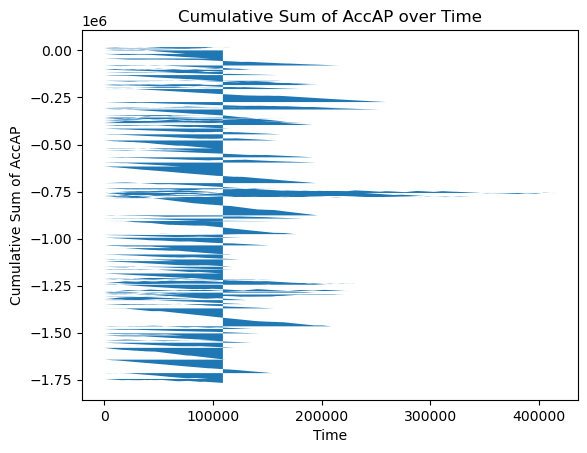

In [15]:
plt.fill_between(dfmaster1['Time'], 0, dfmaster1['AccAP'].cumsum())
plt.xlabel('Time')
plt.ylabel('Cumulative Sum of AccAP')
plt.title('Cumulative Sum of AccAP over Time')
plt.show()


/tmp/ipykernel_32/96283985.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(acceleration_df[column], shade=True)
/tmp/ipykernel_32/96283985.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(acceleration_df[column], shade=True)
/tmp/ipykernel_32/96283985.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(acceleration_df[column], shade=True)


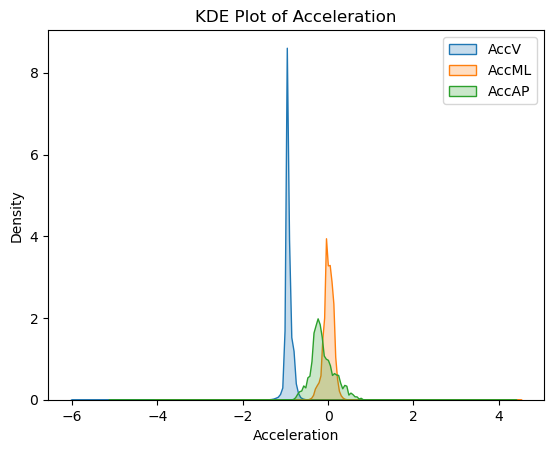

In [16]:
import seaborn as sns

# Create a DataFrame with the acceleration values
acceleration_df = dfmaster1[['AccV', 'AccML', 'AccAP']]

# Create a KDE plot for each acceleration axis
for column in acceleration_df.columns:
    sns.kdeplot(acceleration_df[column], shade=True)

# Add labels and title
plt.xlabel('Acceleration')
plt.ylabel('Density')
plt.title('KDE Plot of Acceleration')
plt.legend(acceleration_df.columns)

# Show the plot
plt.show()


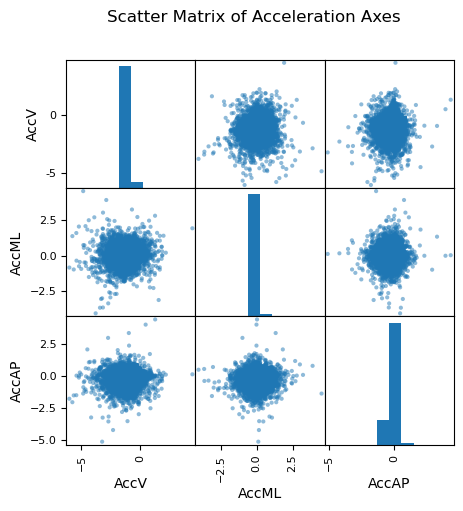

In [17]:
from pandas.plotting import scatter_matrix

axes = ['AccV', 'AccML', 'AccAP']
scatter_matrix(dfmaster1[axes], figsize=(5, 5))
plt.suptitle('Scatter Matrix of Acceleration Axes')
plt.show()


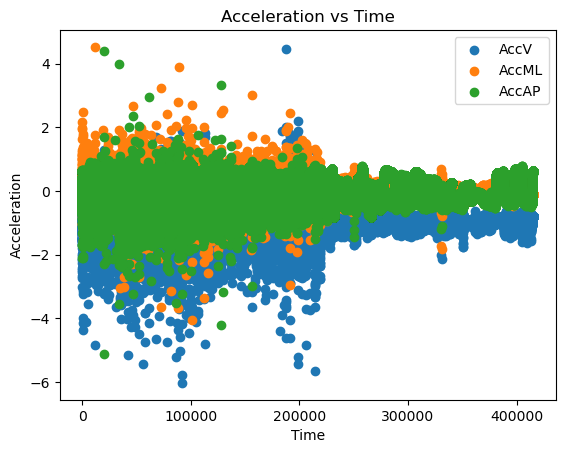

In [18]:
import matplotlib.pyplot as plt

plt.scatter(dfmaster1['Time'], dfmaster1['AccV'], label='AccV')
plt.scatter(dfmaster1['Time'], dfmaster1['AccML'], label='AccML')
plt.scatter(dfmaster1['Time'], dfmaster1['AccAP'], label='AccAP')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.title('Acceleration vs Time')
plt.show()


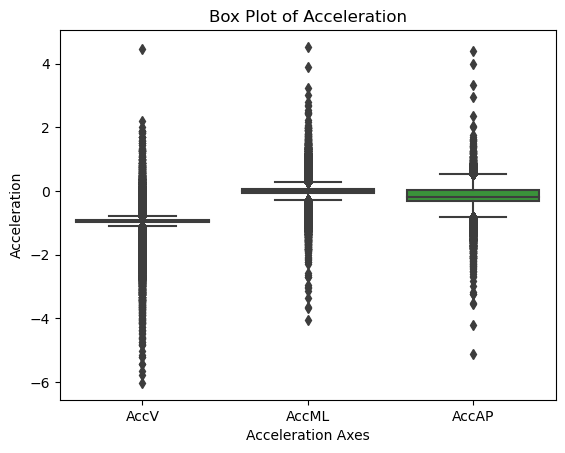

In [19]:
import seaborn as sns

# Specify the dataframe and columns for the box plot
data = dfmaster1[['AccV', 'AccML', 'AccAP']]

# Create the box plot using seaborn
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Acceleration Axes')
plt.ylabel('Acceleration')
plt.title('Box Plot of Acceleration')

# Show the plot
plt.show()


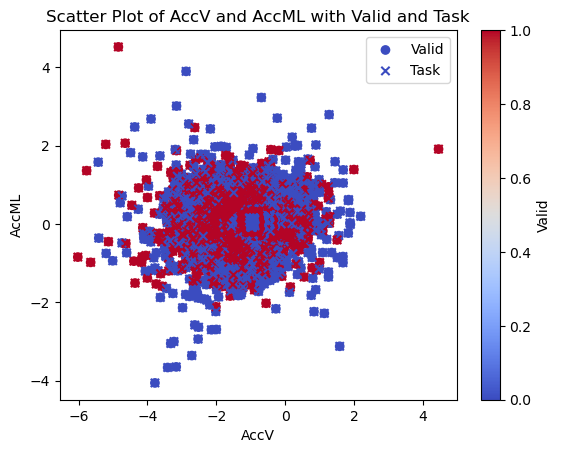

In [20]:
import matplotlib.pyplot as plt

# Scatter plot with different markers or colors for Valid and Task
plt.scatter(dfmaster1['AccV'], dfmaster1['AccML'], c=dfmaster1['Valid'], marker='o', cmap='coolwarm', label='Valid')
plt.scatter(dfmaster1['AccV'], dfmaster1['AccML'], c=dfmaster1['Task'], marker='x', cmap='coolwarm', label='Task')

# Add labels and title
plt.xlabel('AccV')
plt.ylabel('AccML')
plt.title('Scatter Plot of AccV and AccML with Valid and Task')

# Add colorbar and legend
cbar = plt.colorbar()
cbar.set_label('Valid')
plt.legend()

# Show the plot
plt.show()
